# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

In [14]:

city_list=[] 
latitude=[]
longitude=[]
temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]


one_of_fifty_count=0
one_of_ten_count=1
total_cities_count=0




for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        one_of_fifty_count+=1
        print(f"Processing Record {one_of_fifty_count} of Set {one_of_ten_count} | {city}")
        total_cities_count+=1
        if one_of_fifty_count==50:
            one_of_ten_count+=1
            one_of_fifty_count=0
            time.sleep(10)
    except:
        print(f'Negative Return. Skip. {city}')
    

Weather_df=pd.DataFrame({'city':city_list,
               'latitude':latitude,
               'longitude':longitude,
                'temperature':temperature,
                'humidity':humidity,
                'cloudiness':cloudiness,
                'wind_speed':wind_speed})


Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | darhan
Negative Return. Skip. sentyabrskiy
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | la ronge
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | alcudia
Processing Record 12 of Set 1 | syamzha
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | flinders
Processing Record 15 of Set 1 | verkhoyansk
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | bandarbeyla
Negative Return. Skip. taolanaro
Processing Record 18 of Set 1 | ponta do sol
Negative Return. Skip. grand river south east
Processing Record 19 of Set 1 | evora
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | severo-kurilsk
Negative Re

Processing Record 29 of Set 4 | margate
Processing Record 30 of Set 4 | lufilufi
Processing Record 31 of Set 4 | bucerias
Processing Record 32 of Set 4 | richards bay
Processing Record 33 of Set 4 | yebaishou
Processing Record 34 of Set 4 | bethel
Processing Record 35 of Set 4 | kirakira
Processing Record 36 of Set 4 | dhanera
Processing Record 37 of Set 4 | caravelas
Processing Record 38 of Set 4 | ustye
Processing Record 39 of Set 4 | benjamin aceval
Processing Record 40 of Set 4 | selenginsk
Processing Record 41 of Set 4 | hithadhoo
Negative Return. Skip. ayer itam
Processing Record 42 of Set 4 | sorland
Processing Record 43 of Set 4 | road town
Processing Record 44 of Set 4 | nuuk
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | honningsvag
Processing Record 47 of Set 4 | staryy nadym
Processing Record 48 of Set 4 | oussouye
Processing Record 49 of Set 4 | ulladulla
Negative Return. Skip. ituni
Processing Record 50 of Set 4 | ulaangom
Processing Record 1 of S

Processing Record 13 of Set 8 | port hardy
Processing Record 14 of Set 8 | tamugan
Processing Record 15 of Set 8 | kant
Processing Record 16 of Set 8 | nikolskoye
Processing Record 17 of Set 8 | port lincoln
Processing Record 18 of Set 8 | rocha
Processing Record 19 of Set 8 | totma
Processing Record 20 of Set 8 | los zacatones
Processing Record 21 of Set 8 | launceston
Processing Record 22 of Set 8 | pemba
Processing Record 23 of Set 8 | lodja
Processing Record 24 of Set 8 | lowestoft
Processing Record 25 of Set 8 | baillif
Processing Record 26 of Set 8 | mareeba
Processing Record 27 of Set 8 | strzegom
Processing Record 28 of Set 8 | airai
Processing Record 29 of Set 8 | chipata
Processing Record 30 of Set 8 | atasu
Processing Record 31 of Set 8 | isla aguada
Processing Record 32 of Set 8 | taksimo
Processing Record 33 of Set 8 | marystown
Processing Record 34 of Set 8 | obera
Processing Record 35 of Set 8 | ust-ordynskiy
Processing Record 36 of Set 8 | ukiah
Processing Record 37 of 

Processing Record 50 of Set 11 | tekkali
Processing Record 1 of Set 12 | vagur
Processing Record 2 of Set 12 | victor harbor
Negative Return. Skip. mahadday weyne
Processing Record 3 of Set 12 | peniche
Processing Record 4 of Set 12 | bilibino
Processing Record 5 of Set 12 | jaciara
Processing Record 6 of Set 12 | komsomolskiy
Processing Record 7 of Set 12 | storforshei
Processing Record 8 of Set 12 | galbshtadt
Processing Record 9 of Set 12 | bloomsburg
Processing Record 10 of Set 12 | zhigansk
Processing Record 11 of Set 12 | santa rosa
Processing Record 12 of Set 12 | mendi


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
Weather_df.to_csv('weatherdata.csv')
Weather_df

,city,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,Bambous Virieux,-20.34,57.76,77.00,94,75,6.93
1,Darhan,49.49,105.92,-12.06,53,0,7.43
2,Namibe,-15.19,12.15,75.69,100,20,10.67
3,Port Elizabeth,39.31,-74.98,35.26,96,90,10.78
4,Tuktoyaktuk,69.44,-133.03,3.20,84,75,9.17
5,Clyde River,70.47,-68.59,-5.81,76,90,4.70
6,La Ronge,55.10,-105.30,-29.21,66,5,1.16
7,Saint-Philippe,45.36,-73.48,15.73,92,90,5.82
8,Iqaluit,63.75,-68.52,-22.01,74,5,12.75
9,Chuy,-33.69,-53.46,79.20,86,12,11.12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

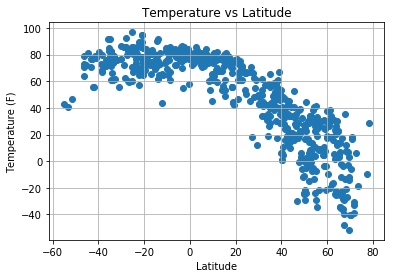

In [16]:
plt.scatter(Weather_df["latitude"], Weather_df["temperature"], marker="o")
plt.title("Temperature vs Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TemperatureW.png")
plt.show()

#### Latitude vs. Humidity Plot

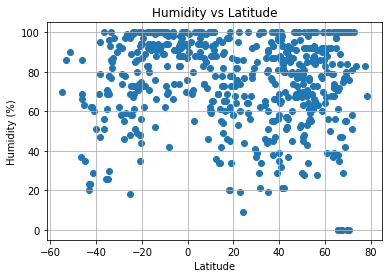

In [17]:
plt.scatter(Weather_df["latitude"], Weather_df["humidity"], marker="o")
plt.title("Humidity vs Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

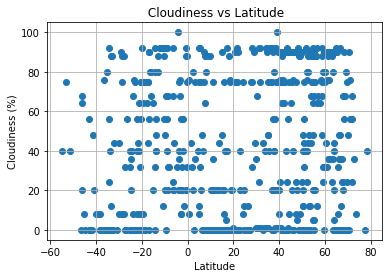

In [18]:
plt.scatter(Weather_df["latitude"], Weather_df["cloudiness"], marker="o")
plt.title(" Cloudiness vs Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

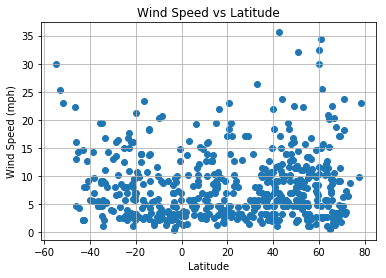

In [20]:
plt.scatter(Weather_df["latitude"], Weather_df["wind_speed"], marker="o")
plt.title("Wind Speed vs Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Windspeed.png")
plt.show()